# Let's start by doing some data preprocessing

### First we'll import our training dataframe

In [167]:
import pandas as pd
df = pd.read_csv('titanic-training-dataset.csv')

### Let's inspect our dataframe a bit

In [168]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing data observations
<ul>
    <li>Cabin is missing a lot of data, we'll get rid of the cabin feature later</li>
    <li>Embarked is missing two data values, we can just get rid of these two entries</li>
    <li>Age is missing some values, we will impute values for these</li>
</ul>

### Let's impute the missing ages based on the Pclass of the person
( We'll get back to the Cabin and Embarked features later )

In [170]:
# Impute age based on Pclass
def impute_age(age_pclass):
    age = age_pclass[0]
    pclass = age_pclass[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38 # Average age of people in first class
        elif pclass == 2:
            return 30 # Average age of people in second class
        else: 
            return 25 # Average age of people in third class
    else:
        return age # Returns the age if it was not null to begin with
    
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

## Time for some new features!
### First we extract the title of the person which can be found in the Name column

In [171]:
# Create Title from Name column and remove Name column
# 1 = Miss , 2 = Mrs , 3 = Mr , 4 = Master , 5 = Other
df['Title'] = df['Name'].str.split(',', expand = True)[1]
df['Title'] = df['Title'].str.split(' ', expand = True)[1]
df['Title'] = df['Title'].replace(['Mlle.', 'Ms.', 'Miss.'], 1)
df['Title'] = df['Title'].replace(['Mrs.', 'Mme.'], 2)
df['Title'] = df['Title'].replace('Mr.', 3)
df['Title'] = df['Title'].replace('Master.', 4)
df['Title'] = df['Title'].replace(['Lady.', 'Countess.','Capt.', 'Col.','Dr.', 'Major.', 'Rev.', 'Sir.', 'Don.', 'Jonkheer.', 'Dona.'], 5)

### Let's make some groups called AgeGroup and FareGroup

In [172]:
def age_groups(age):
    if age < 10:
        return 0 # 0-10 years 
    elif age < 20:
        return 1 # 10-20 years
    elif age < 30:
        return 2 # 20-30 years 
    elif age < 40:
        return 4 # 30-40 years
    elif age < 50:
        return 5 # 40-50 years
    elif age < 60:
        return 6 # 50-60 years
    else:
        return 7 # >60 years

def fare_groups(fare):
    if fare < 10:
        return 1 # 0-10 pounds
    elif fare < 20:
        return 2 # 10-20 pounds
    elif fare < 30:
        return 3 # 20-30 pounds
    elif fare < 40:
        return 3 # 30-40 pounds
    elif fare < 50:
        return 4 # 40-50 pounds
    elif fare < 100:
        return 5 # 50-100 pounds
    else:
        return 6 # >100 pounds
    
df['AgeGroup'] = df['Age'].apply(age_groups)
df['FareGroup'] = df['Fare'].apply(fare_groups)

### Also the size of a person's family and whether or not they are alone can be of interest

In [173]:
def is_alone(family_size):
    if family_size == 1:
        return 1
    else:
        return 0
    
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(is_alone)

### Let's quickly encode the Sex and Embarked Feature

In [174]:
# Encode Sex to: female = 0 , male = 1
df['Sex'] = df['Sex'].replace(['female', 'male'], [0,1])

# Encode Embarked: S = 0 , C = 1, Q = 2
df['Embarked'] = df['Embarked'].replace(['S','C','Q'], [0,1,2])

### Now we can drop some features which don't contain such interesting data

In [175]:
# Delete Cabin, Name, Fare, Ticket, Age and PassengerId column
df.drop(['Cabin', 'Name', 'Ticket', 'Fare', 'PassengerId', 'Age'], 1, inplace=True)

/tmp/ipykernel_8240/1068155920.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Cabin', 'Name', 'Ticket', 'Fare', 'PassengerId', 'Age'], 1, inplace=True)


### Now we can remove the two rows containing null values for Embarked
#### And whilst we're at it, we can also encode the Embarked feature

In [176]:
# Remove two rows with null value at Embarked
df.dropna(inplace=True)

# Encode Embarked: S = 0 , C = 1, Q = 2
df['Embarked'] = df['Embarked'].replace(['S','C','Q'], [0,1,2])

## Time to have another look at our cleaned up dataframe!

In [177]:
df.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareGroup,FamilySize,IsAlone
0,0,3,1,1,0,0.0,3,2,1,2,0
1,1,1,0,1,0,1.0,2,4,5,2,0
2,1,3,0,0,0,0.0,1,2,1,1,1
3,1,1,0,1,0,0.0,2,4,5,2,0
4,0,3,1,0,0,0.0,3,4,1,1,1
5,0,3,1,0,0,2.0,3,2,1,1,1
6,0,1,1,0,0,0.0,3,6,5,1,1
7,0,3,1,3,1,0.0,4,0,3,5,0
8,1,3,0,0,2,0.0,2,2,2,3,0
9,1,2,0,1,0,1.0,2,1,3,2,0


# Time to analyse the data by creating beautiful figures! 
( Note that better formatted figures can be found in the github repository ) 

### First we set a nice style for our grid

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set grid style
sns.set(style="darkgrid")

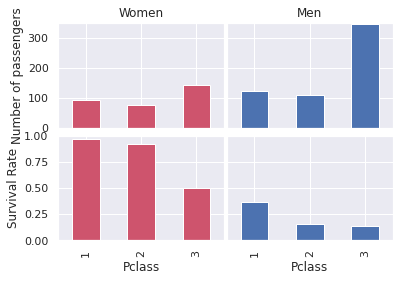

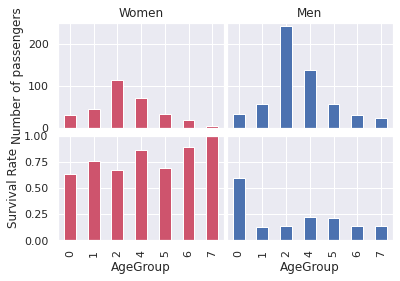

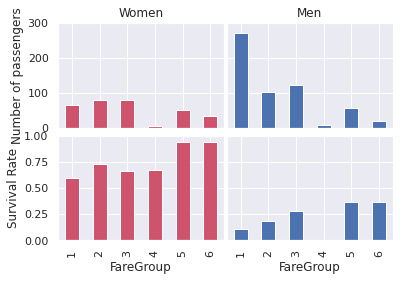

In [179]:
#### Creates four plots in one figure  splitted in women/men and absolute numbers/percentages ####
# The top two plots are in absolute numbers of passengers
# The bottom two plots are the percentage of survivors
# The left two plots are women, the right two plots are men
# df = dataframe, feature = sets column that will be used on the x-axis, ylim = sets height of the y-axis for the top two plots
def CreateFigureWomenMen(df, feature, ylim):
    fig, axs = plt.subplots(2,2, sharex=True, num=feature)
    plt.subplots_adjust(wspace=0.016, hspace=0.075)
    
    # The two plots with absolute number of passengers
    survived_women_feature = df[df['Sex'] == 0].groupby(feature)["Survived"].count()
    survived_men_feature = df[df['Sex'] == 1].groupby(feature)["Survived"].count()
    axs[0,0] = survived_women_feature.plot.bar(ax=axs[0,0], sharey=True, color="#ce546d", title="Women")
    axs[0,1]  = survived_men_feature.plot.bar(ax=axs[0,1], sharey=True, title="Men")
    axs[0,0].set_ylabel("Number of passengers")
    axs[0,0].set_ylim(0, ylim)
    axs[0,1].set_ylim(0, ylim)

    # The two plots with the survival rate
    survival_rate_women_feature = df[df["Sex"] == 0].groupby(feature)["Survived"].mean()
    survival_rate_men_feature = df[df["Sex"] == 1].groupby(feature)["Survived"].mean()
    axs[1,0] = survival_rate_women_feature.plot.bar(ax=axs[1,0], color="#ce546d", sharey=True)
    axs[1,1] = survival_rate_men_feature.plot.bar(ax=axs[1,1], sharey=True)
    axs[1,0].set_ylabel("Survival Rate")
    axs[1,0].set_ylim(0.0, 1.0)
    axs[1,1].set_ylim(0.0, 1.0)

# Create the women/men figures
features = ('Pclass', 'AgeGroup', 'FareGroup')
y_limits = (350, 250, 300)
figures = list(map(CreateFigureWomenMen, [df]*3, features, y_limits))

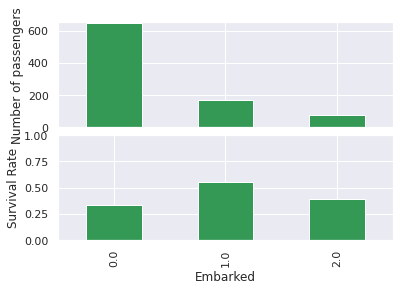

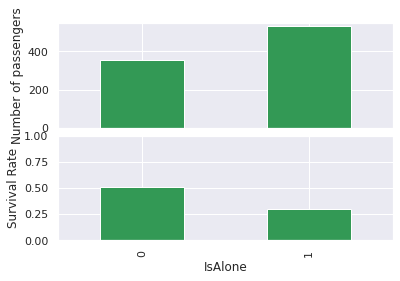

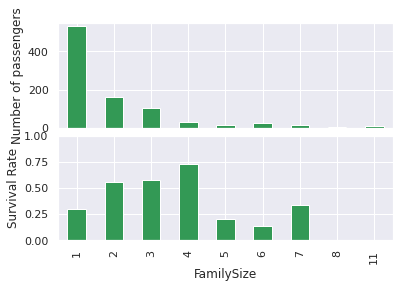

In [180]:
#### Creates two plots in one figure ####
# The top plot is the absolute number of passengers per feature
# The bottom plot is the percentage of survivors per feature
# df = dataframe, feature = sets column that will be used on the x-axis, ylim = sets height of the y-axis for the top two plots
def CreateFigure(df, feature, ylim):
    figure_Embarked, axs = plt.subplots(2,1, sharex=True, num=feature)
    plt.subplots_adjust(wspace=0.016, hspace=0.075)

    # figure 4.0 - Number of passengers that survived per embark location
    survived_by_embarked = df.groupby(feature)["Survived"].count()
    axs[0] = survived_by_embarked.plot.bar(ax=axs[0], color=["#339955"])
    axs[0].set_ylabel("Number of passengers")
    axs[0].set_ylim(0, ylim)

    # figure 4.1 - Survival rate for passengers per embark location
    survival_rate_by_embarked = df.groupby(feature)["Survived"].mean()
    axs[1] = survival_rate_by_embarked.plot.bar(ax=axs[1], color=["#339955"])
    axs[1].set_ylabel("Survival Rate")
    axs[1].set_ylim(0.0, 1.0)
    
# Create the other figures
features1 = ('Embarked', 'IsAlone', 'FamilySize', 'Title')
y_limits1 = (650, 550, 550, 550)
figures.append(list(map(CreateFigure, [df]*3, features1, y_limits1)))

# Machine learning time!
### First we'll import some functions from scikitlearn 

In [181]:
# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Now train a bunch of models using Cross Validation to see which one works best on our dataframe. We use Cross Validation as it is a small dataframe and it's more accurate than train/test split.

In [182]:
x = df.drop('Survived', axis=1)
y = df['Survived']

# training and evaluating models using Cross-validation
def train_and_evaluate_model(model, name):
    scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    print(name + " Cross validated score: " + str(round(scores.mean(),3)))

models = [LogisticRegression(), SVC(), KNeighborsClassifier(n_neighbors = 13), GaussianNB(), Perceptron(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(n_estimators = 100), RidgeClassifierCV()]
model_names = ["Logistic regression", "SVM", "KNN", "Gaussian Naive bayes", "Perceptron", "Decision Tree", "Random Forest", "Gradient boosting", "Ridge classifier CV"]
list(map(train_and_evaluate_model, models, model_names))

Logistic regression Cross validated score: 0.803
SVM Cross validated score: 0.822
KNN Cross validated score: 0.794
Gaussian Naive bayes Cross validated score: 0.782
Perceptron Cross validated score: 0.719
Decision Tree Cross validated score: 0.791
Random Forest Cross validated score: 0.809
Gradient boosting Cross validated score: 0.816
Ridge classifier CV Cross validated score: 0.799


[None, None, None, None, None, None, None, None, None]

### It looks like SVM is the best model for this data. Let's do some feature selection.
### We will use forward sequential feature selection to select our features

In [183]:
from sklearn.feature_selection import SequentialFeatureSelector
svm = SVC()
sfs = SequentialFeatureSelector(svm, n_features_to_select=4, direction='forward')
sfs.fit(x,y)
sfs.get_feature_names_out()

array(['Pclass', 'Sex', 'AgeGroup', 'FamilySize'], dtype=object)

In [184]:
# Features selected from forward feature selection
features = ['Pclass', 'Sex', 'AgeGroup', 'FamilySize']
svm = SVC()
x = df[features]
round(cross_val_score(svm, x, y, cv=10, scoring='accuracy').mean(),2)

0.83

### We will use the SVM model with the following features
<ul>
    <li>Pclass</li>
    <li>Sex</li>
    <li>AgeGroup</li>
    <li>FamilySize</li>
</ul>
<b>Cross validation accuracy is 0.83</b>

## Let's use GridSearchCV to find the optimal parameters for our model

In [185]:
from sklearn.model_selection import GridSearchCV
import numpy as np

gamma_range = np.arange(0.005, 0.3, 0.005)
C_range = np.arange(30, 110, 5.0)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 95.0, 'gamma': 0.034999999999999996} with a score of 0.83


## Since the parameterse of GridSearchCV don't outperform the default, we will stick to the default values of SVM
### We will train the model on all of our training data

In [186]:
svm = SVC(kernel='rbf')
svm.fit(x,y)
prediction = pd.DataFrame({
    'Pclass': 3,
    'Sex': 0,
    'AgeGroup': 6,
    'FamilySize': 4
}, index=[0,1,2,3])

array([0, 0, 0, 0])

# Save the model

In [189]:
import joblib
joblib.dump(svm, "classifier.joblib")

['classifier.joblib']

/home/rob/.local/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parch
- SibSp
Feature names seen at fit time, yet now missing:
- AgeGroup
- FamilySize

  warnings.warn(message, FutureWarning)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,